## Data dimensionality reduction


### Load the data

In [1]:
from keras.datasets.mnist import load_data
import numpy as np
(X_train, y_train), (X_test, y_test) = load_data()
X_train = X_train.reshape((-1, 28*28))
X_test = X_test.reshape((-1, 28*28))

X_train, y_train = X_train[:1000], y_train[:1000]
X_test, y_test = X_test[:100], y_test[:100]

Using TensorFlow backend.


### Let's try an unsupervised method:


In [6]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=50)
pca_model.fit(X_train)


PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:
X_transformed_train = pca_model.transform(X_train)
X_transformed_test = pca_model.transform(X_test)

In [8]:
print(X_train.shape, X_test.shape)
print(X_transformed_train.shape, X_transformed_test.shape)

(1000, 784) (100, 784)
(1000, 50) (100, 50)


In [10]:
print(pca_model.explained_variance_ratio_)
print(np.cumsum(pca_model.explained_variance_ratio_))

[0.09931776 0.07755832 0.06838248 0.05425498 0.04871299 0.04536464
 0.03510727 0.03029976 0.02858115 0.02162475 0.02055156 0.01865471
 0.01823188 0.01788571 0.01638366 0.01467557 0.01301585 0.01254282
 0.01236201 0.01134489 0.01082028 0.01000415 0.00961257 0.00925081
 0.00870207 0.00831574 0.0081002  0.00757212 0.00723156 0.0067979
 0.00665876 0.00639761 0.00616462 0.00575265 0.00535367 0.00513783
 0.0050887  0.00492952 0.00474    0.00454155 0.00435419 0.00427312
 0.00405716 0.00389135 0.00367575 0.00363075 0.00354485 0.00342947
 0.00332449 0.00319768]
[0.09931776 0.17687608 0.24525856 0.29951353 0.34822652 0.39359116
 0.42869843 0.4589982  0.48757934 0.50920409 0.52975565 0.54841036
 0.56664224 0.58452794 0.6009116  0.61558718 0.62860302 0.64114585
 0.65350786 0.66485275 0.67567303 0.68567718 0.69528975 0.70454056
 0.71324263 0.72155837 0.72965857 0.73723069 0.74446224 0.75126014
 0.7579189  0.76431651 0.77048113 0.77623379 0.78158746 0.78672529
 0.79181398 0.7967435  0.8014835  0.806

### Original data

In [11]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
model.fit(X_train, y_train)
print("Train acc =", model.score(X_train, y_train))
print("Test acc =", model.score(X_test, y_test))

Train acc = 0.925
Test acc = 0.83


### Reduced dimensionality (PCA)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

model.fit(X_transformed_train, y_train)
print("Train acc =", model.score(X_transformed_train, y_train))
print("Test acc =", model.score(X_transformed_test, y_test))

Train acc = 0.941
Test acc = 0.87


### Let's try a supervised method:


In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = LinearDiscriminantAnalysis(n_components=9)
lda_model.fit(X_train, y_train)


/home/nick/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=9, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [22]:
X_transformed_train = lda_model.transform(X_train)
X_transformed_test = lda_model.transform(X_test)

model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

model.fit(X_transformed_train, y_train)
print("Train acc =", model.score(X_transformed_train, y_train))
print("Test acc =", model.score(X_transformed_test, y_test))

Train acc = 0.998
Test acc = 0.76


### Another use: visualizing data

In [23]:
lda_model = LinearDiscriminantAnalysis(n_components=2)
lda_model.fit(X_train, y_train)

/home/nick/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [24]:
X_transformed_train = lda_model.transform(X_train)
X_transformed_test = lda_model.transform(X_test)

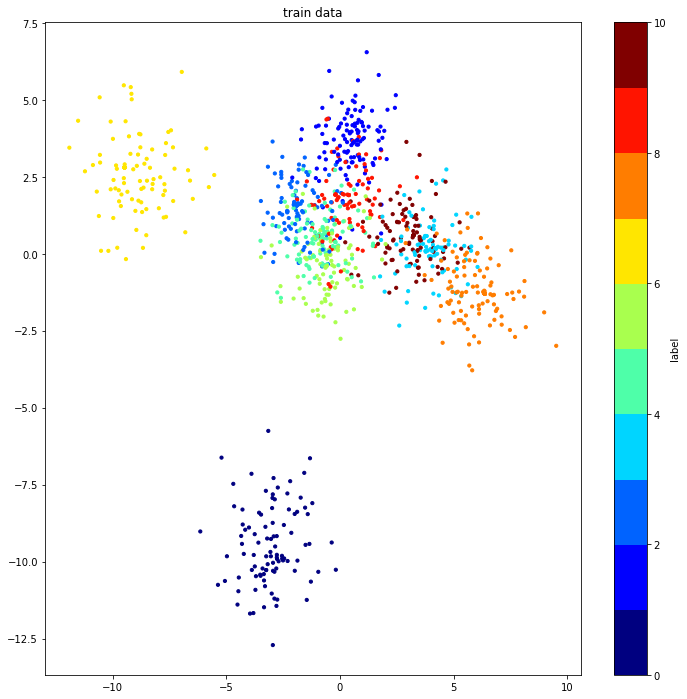

In [52]:
import matplotlib as mpl
import matplotlib.pyplot as plt


# setup the plot
fig, ax = plt.subplots(1,1, figsize=(12,12))
cmap = cmap.from_list('Custom cmap',[plt.cm.jet(i) for i in range( plt.cm.jet.N)], 10)

# make the scatter
scat = ax.scatter(X_transformed_train[:, 0],X_transformed_train[:, 1],
                  c=y_train,s=10,cmap=cmap,
                  norm = mpl.colors.BoundaryNorm(np.linspace(0,10,10+1), cmap.N))

cb = plt.colorbar(scat)
cb.set_label('label')
ax.set_title('train data (LDA)')
plt.show()

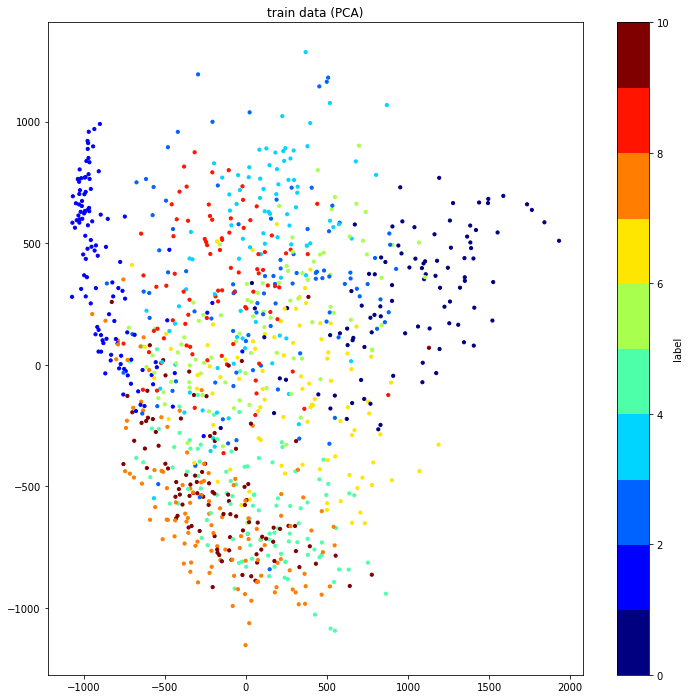

In [54]:


pca_model = PCA(n_components=2)
pca_model.fit(X_train)
X_transformed_train = pca_model.transform(X_train)
X_transformed_test = pca_model.transform(X_test)


# setup the plot
fig, ax = plt.subplots(1,1, figsize=(12,12))
cmap = cmap.from_list('Custom cmap',[plt.cm.jet(i) for i in range( plt.cm.jet.N)], 10)

# make the scatter
scat = ax.scatter(X_transformed_train[:, 0],X_transformed_train[:, 1],
                  c=y_train,s=10,cmap=cmap,
                  norm = mpl.colors.BoundaryNorm(np.linspace(0,10,10+1), cmap.N))

cb = plt.colorbar(scat)
cb.set_label('label')
ax.set_title('train data (PCA)')
plt.show()